In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#라이브러리
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
# 카테고리 지정하기
categories = ["Boone","Yangban","Choraeng","Halmi"]
nb_classes = len(categories)

# 데이터 불러오기 --- (※1)
X_tr, X_test, y_tr, y_test = np.load("/content/drive/MyDrive/matlab 공모전/data_file/npydataset.npy", allow_pickle=True)
print('X_train shape:', X_tr.shape)

X_train shape: (11642, 125, 125)


In [ ]:
y_tr.shape

(11642, 4)

In [ ]:
X_tr =np.expand_dims(X_tr, axis=3)
X_test =np.expand_dims(X_test, axis=3)

In [ ]:
X_tr.shape #이미지수, 높이, 너비, 채널수

(11642, 125, 125, 1)

In [ ]:
sss = StratifiedShuffleSplit(test_size=0.1, random_state=0)
for train_idx, valid_idx in sss.split(X_tr, y_tr):
    X_train = X_tr[train_idx]
    X_val = X_tr[valid_idx]
    y_train = y_tr[train_idx]
    y_val = y_tr[valid_idx]

In [ ]:
y_val.shape

(1165, 4)

In [ ]:
X_train.shape

(10477, 125, 125, 1)

In [ ]:
# 데이터 정규화하기
X_train = X_train.astype("float") / 256
X_test  = X_test.astype("float")  / 256
X_val  = X_val.astype("float")  / 256

In [ ]:
# 모델 구축하기 --- (※2)
model = Sequential()
model.add(Convolution2D(8, kernel_size=(3,3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(16, kernel_size=(3,3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Convolution2D(32, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(32, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2), padding='same'))

model.add(Convolution2D(64,kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3, 3)))


model.add(Flatten()) # --- (※3)
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.7))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
    optimizer= 'adam',
    metrics=['accuracy'])

# 모델 훈련하기 --- (※4)
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

cnn1 = model.fit(X_train, y_train, batch_size=32, epochs=16, validation_data=(X_val, y_val), callbacks=[early_stopping]) #])

print(cnn1.history['loss'])
print(cnn1.history['acc'])
print(cnn1.history['val_loss'])
print(cnn1.history['val_acc'])



Epoch 1/16
328/328 [==============================] - 275s 821ms/step - loss: 1.3797 - accuracy: 0.2836 - val_loss: 1.3775 - val_accuracy: 0.2893
Epoch 2/16
328/328 [==============================] - 254s 776ms/step - loss: 1.3544 - accuracy: 0.3207 - val_loss: 1.2859 - val_accuracy: 0.4172
Epoch 3/16
328/328 [==============================] - 253s 770ms/step - loss: 1.1573 - accuracy: 0.4739 - val_loss: 0.9855 - val_accuracy: 0.5502
Epoch 4/16
328/328 [==============================] - 249s 760ms/step - loss: 0.9572 - accuracy: 0.5854 - val_loss: 0.7774 - val_accuracy: 0.6764
Epoch 5/16
328/328 [==============================] - 248s 758ms/step - loss: 0.7707 - accuracy: 0.6750 - val_loss: 0.6053 - val_accuracy: 0.7923
Epoch 6/16
328/328 [==============================] - 253s 771ms/step - loss: 0.5901 - accuracy: 0.7593 - val_loss: 0.4856 - val_accuracy: 0.8189
Epoch 7/16
328/328 [==============================] - 255s 778ms/step - loss: 0.4657 - accuracy: 0.8163 - val_loss: 0.3236 -

KeyError: ignored

In [ ]:
# 모델 평가하기--- (※5)
score = model.evaluate(X_test, y_test)
print('loss=', score[0])
print('accuracy=', score[1])

91/91 [==============================] - 17s 182ms/step - loss: 0.2238 - accuracy: 0.9292
loss= 0.22383475303649902
accuracy= 0.929233968257904


In [ ]:
model.save('/content/drive/MyDrive/matlab 공모전/data_file/cnn1.h5')

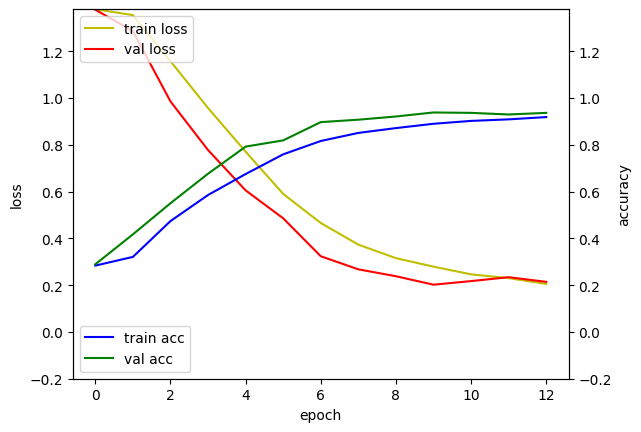

In [ ]:
import matplotlib.pyplot as plt

# 모델 저장

# 학습과정 그래프
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(cnn1.history['loss'], 'y', label='train loss')
loss_ax.plot(cnn1.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.38])

acc_ax.plot(cnn1.history['accuracy'], 'b', label='train acc')
acc_ax.plot(cnn1.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.38])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

fig = plt.gcf()
plt.show()
fig.savefig('.png', bbox_inches='tight')

In [ ]:
#모델 불러오기
from keras.models import load_model
cnn1_test = load_model('/content/drive/MyDrive/matlab 공모전/data_file/cnn1.h5')

In [ ]:
from keras.utils.image_dataset import load_image
#새 데이터를 예측
import tensorflow as tf
import keras
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np

img1= Image.open("/content/drive/MyDrive/matlab 공모전/new_data/use_front_1.jpg")
img2 = Image.open("/content/drive/MyDrive/matlab 공모전/new_data/use_front_2.jpg")

img1 = img1.convert("L")
img1 = img1.resize((125, 125))
img2 = img2.convert("L")
img2 = img2.resize((125, 125))

In [ ]:
np_img1 = np.array(img1)
np_img2 = np.array(img2)

img_batch1 = np.expand_dims(np_img1, axis=0)
img_batch2 = np.expand_dims(np_img2, axis=0)

In [ ]:
img_batch1 = np.expand_dims(img_batch1, axis=3)
img_batch2 = np.expand_dims(img_batch2, axis=3)

In [ ]:
img_batch1.shape

(1, 125, 125, 1)

In [ ]:
img_batch1 = img_batch1.astype("float") / 256
img_batch2 = img_batch2.astype("float") / 256

In [ ]:
y_pred1 = cnn1_test.predict(img_batch1)
y_pred1

#가장 확률이 높은 값
#np.max(y_pred2)
#np.set_printoptions(suppress=True, precision=10)

1/1 [==============================] - 0s 56ms/step


array([[0.24878058, 0.47655463, 0.2517295 , 0.0229353 ]], dtype=float32)

In [ ]:
y_pred2 = cnn1_test.predict(img_batch2)
y_pred2

1/1 [==============================] - 0s 32ms/step


array([[7.9852104e-01, 2.0147640e-01, 2.0274649e-07, 2.3352641e-06]],
      dtype=float32)

In [ ]:
np.max(y_pred1)

0.47655463

In [ ]:
np.max(y_pred2)

0.79852104